In [1]:
import sys
import pandas as pd

from src import load_clean_data, load_raw_data, plot_distributions,save_processed_data,detect_outliers, create_insightful_visuals
sys.path.append("../src")
file_path  = '../data/raw/MachineLearningRating_v3.txt'
insurance_df = load_raw_data(file_path)
insurance_df.head()


INFO:src.utils.load_data:Loaded 1000098 records from ../data/raw/MachineLearningRating_v3.txt.


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [2]:

clean_data = save_processed_data(insurance_df)

INFO:src.utils.save_data:Successfully saved 1000098 records to /Users/worash/Desktop/tenx/week3/car-insurance-predictive-model/data/clean/car_insurance_processed.txt


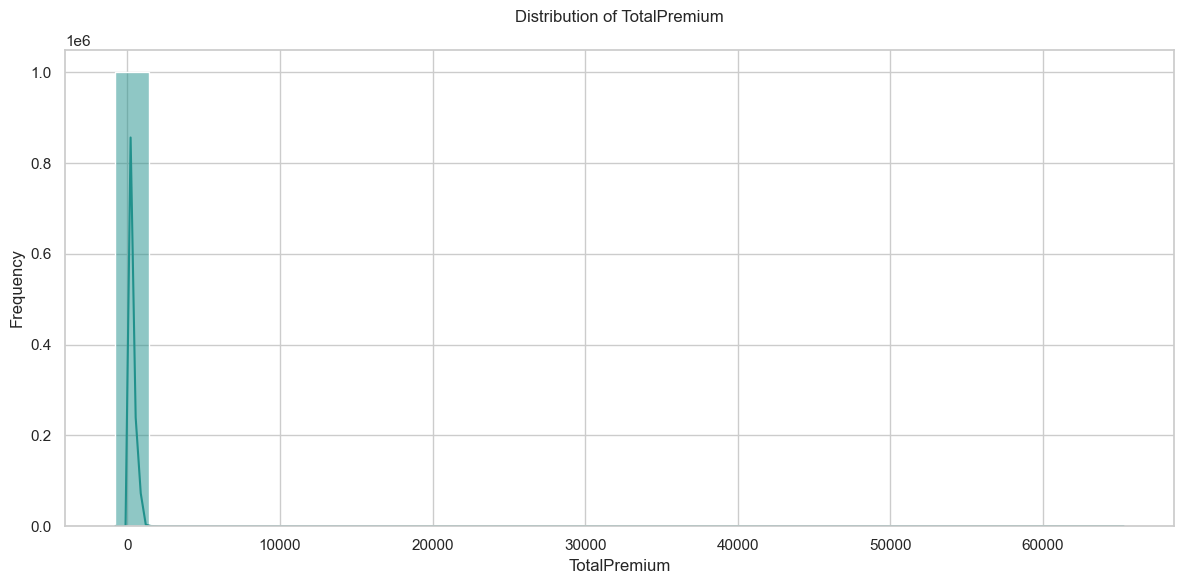

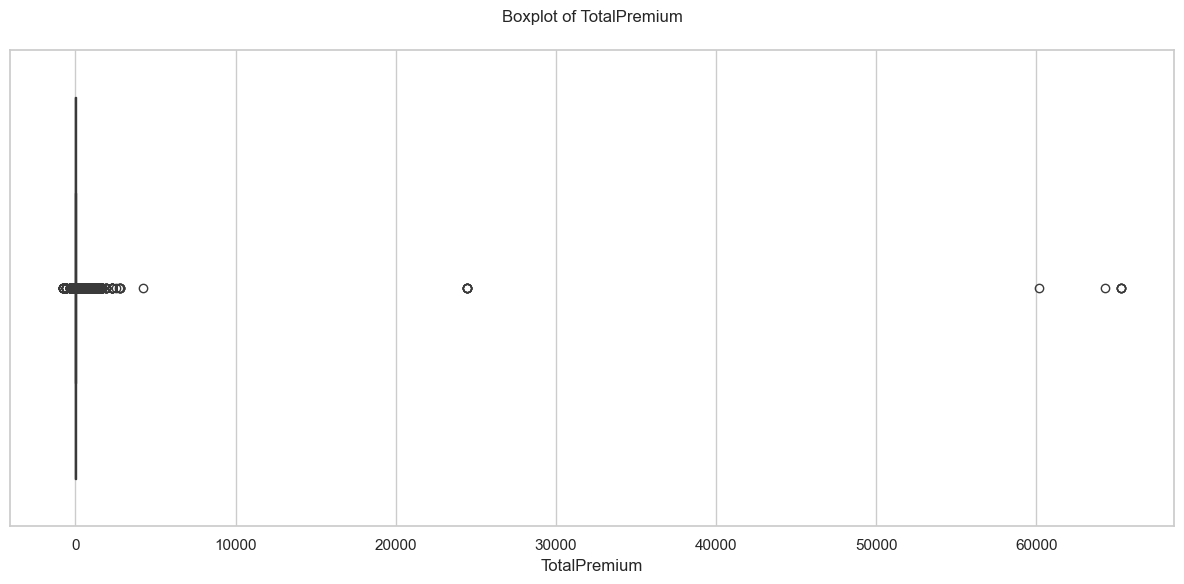

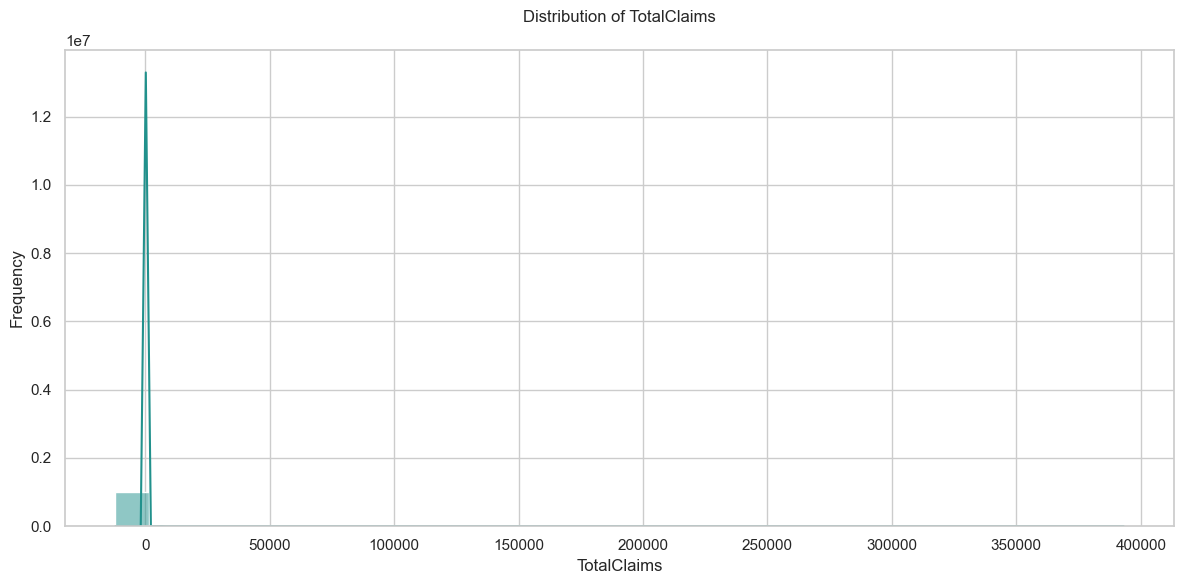

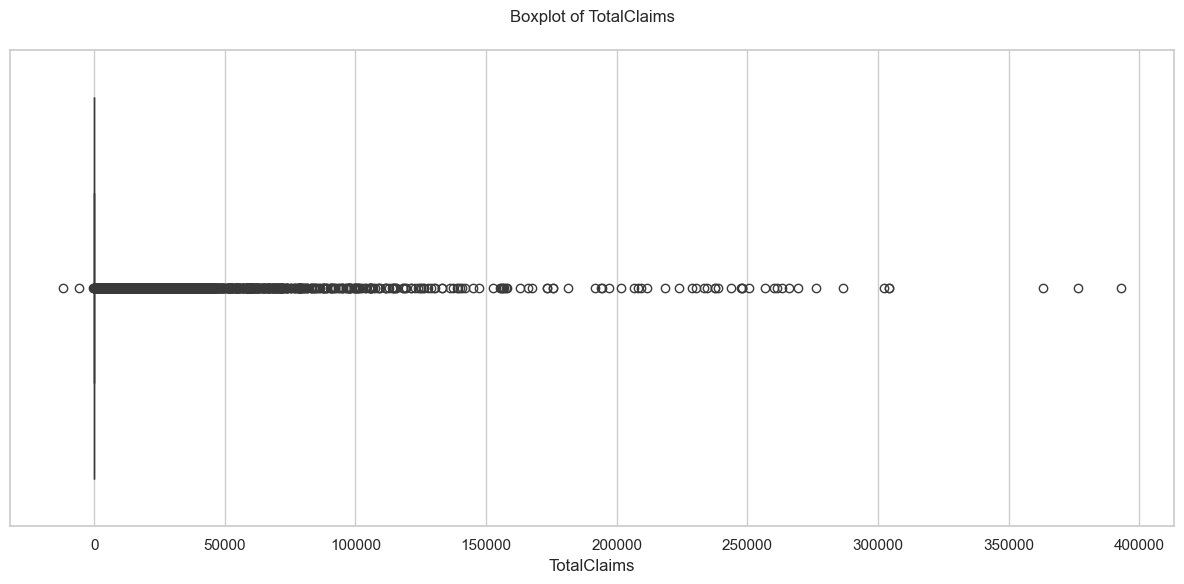

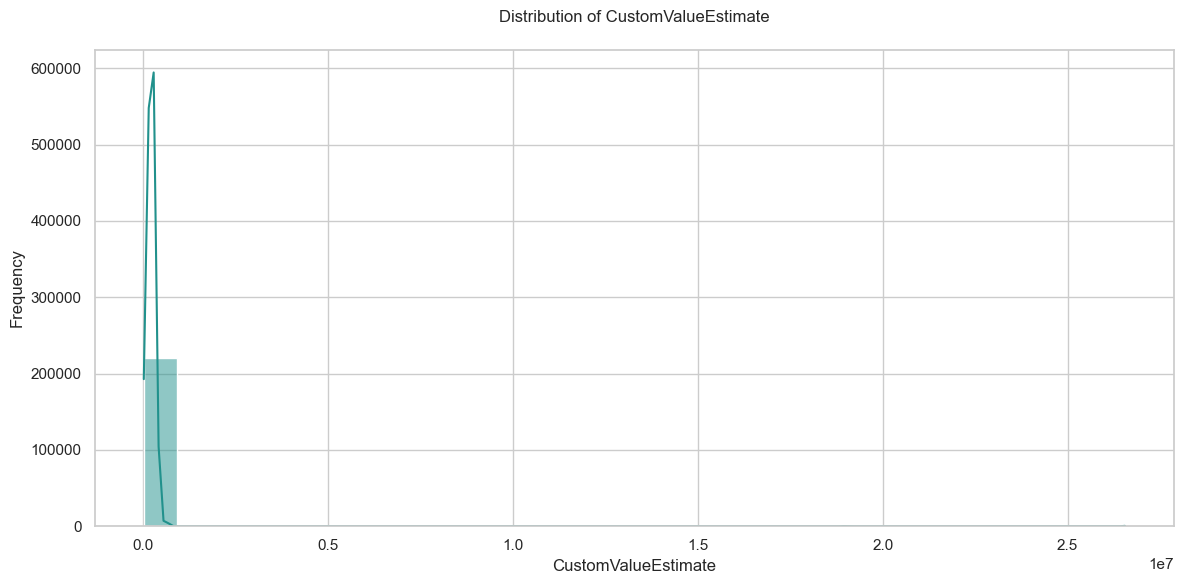

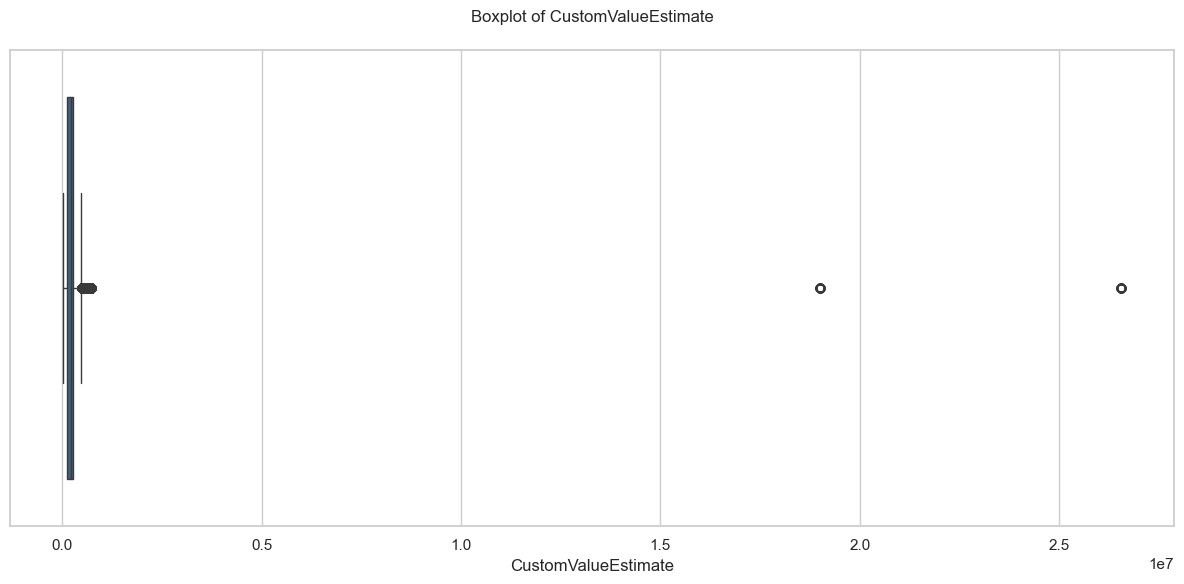

/Users/worash/Desktop/tenx/week3/car-insurance-predictive-model/src/features/plot_distributions.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
/Users/worash/Desktop/tenx/week3/car-insurance-predictive-model/src/features/plot_distributions.py:90: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation, ha='right')


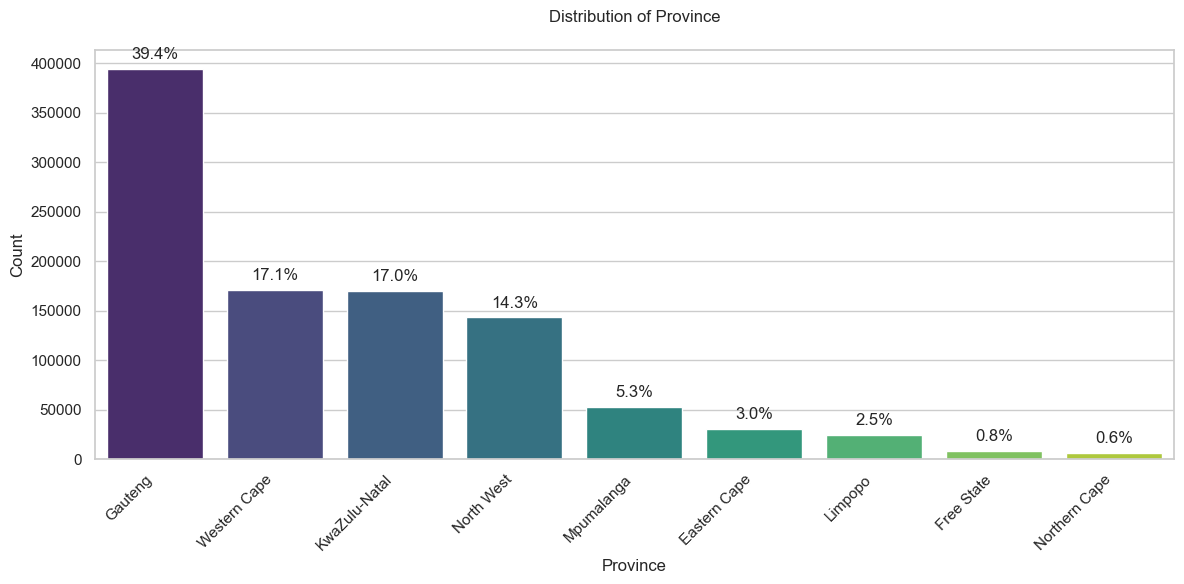

/Users/worash/Desktop/tenx/week3/car-insurance-predictive-model/src/features/plot_distributions.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
/Users/worash/Desktop/tenx/week3/car-insurance-predictive-model/src/features/plot_distributions.py:90: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation, ha='right')


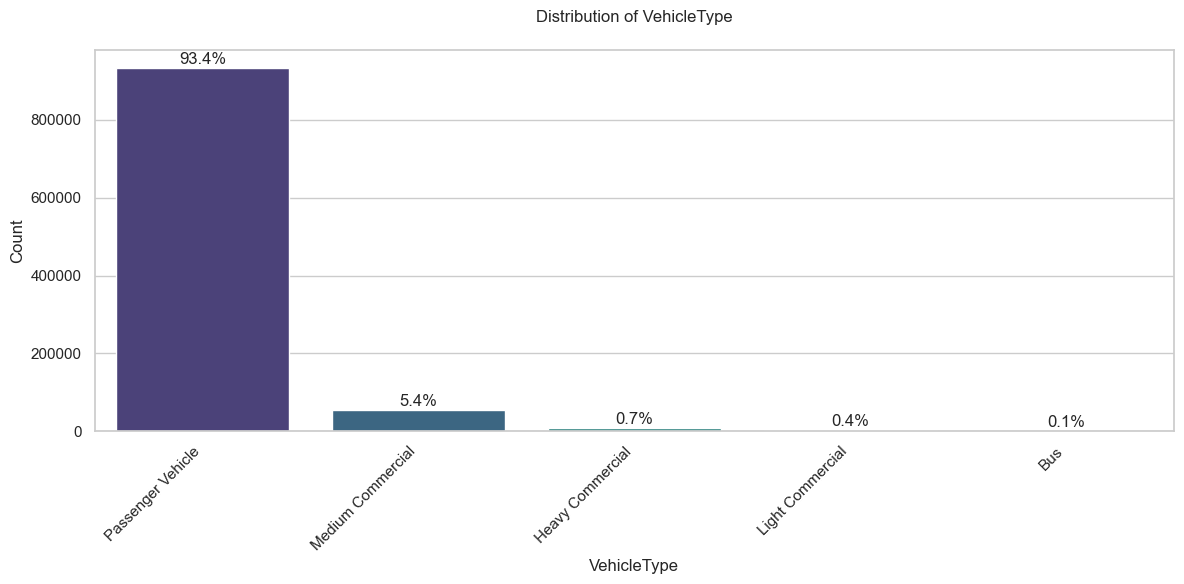

/Users/worash/Desktop/tenx/week3/car-insurance-predictive-model/src/features/plot_distributions.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
/Users/worash/Desktop/tenx/week3/car-insurance-predictive-model/src/features/plot_distributions.py:90: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation, ha='right')


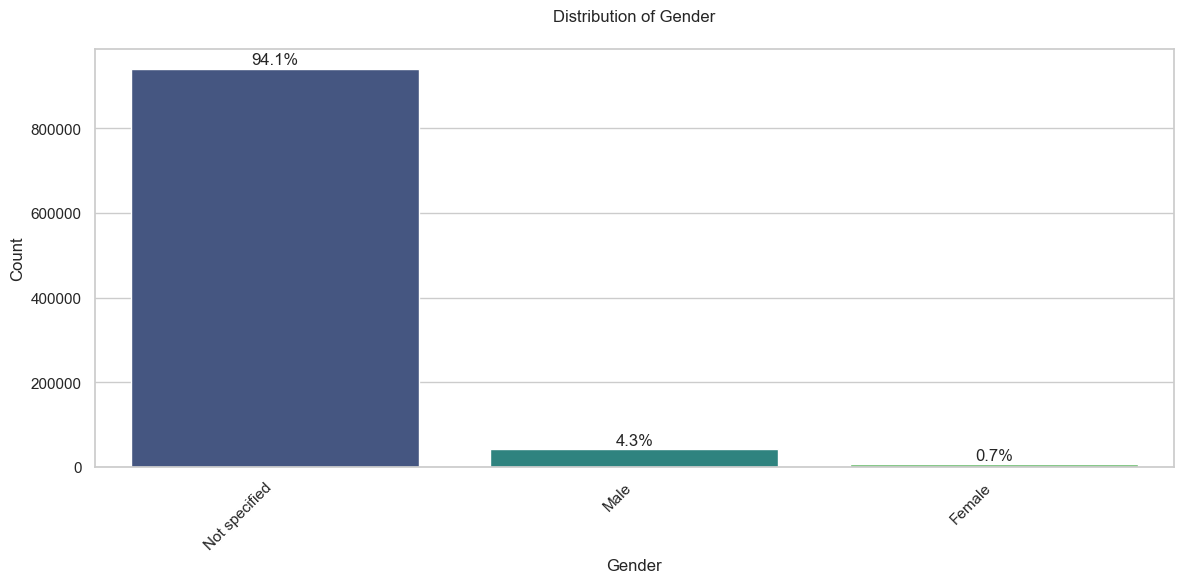

In [3]:
plot_distributions(
    clean_data,
    numerical_cols=['TotalPremium', 'TotalClaims', 'CustomValueEstimate'],
    categorical_cols=['Province', 'VehicleType', 'Gender'],
    figsize=(12, 6),
    rotation=45
)


📊 Outlier Analysis for TotalClaims:
• Lower bound: 0.00
• Upper bound: 0.00
• Number of outliers: 2793 (0.28% of data)
• Min outlier value: -12002.41
• Max outlier value: 393092.11


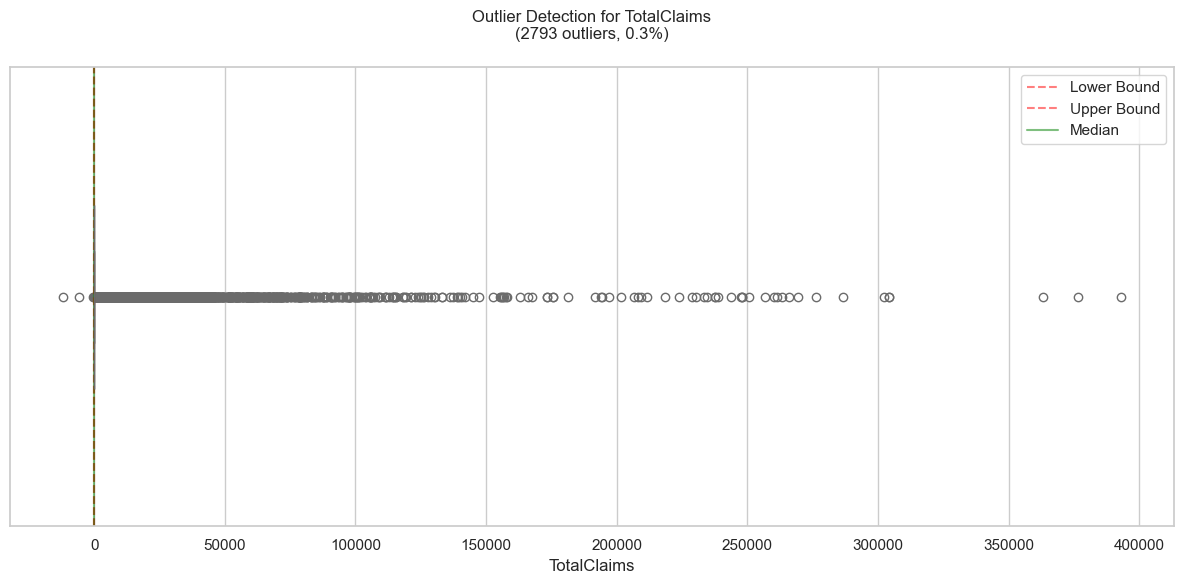

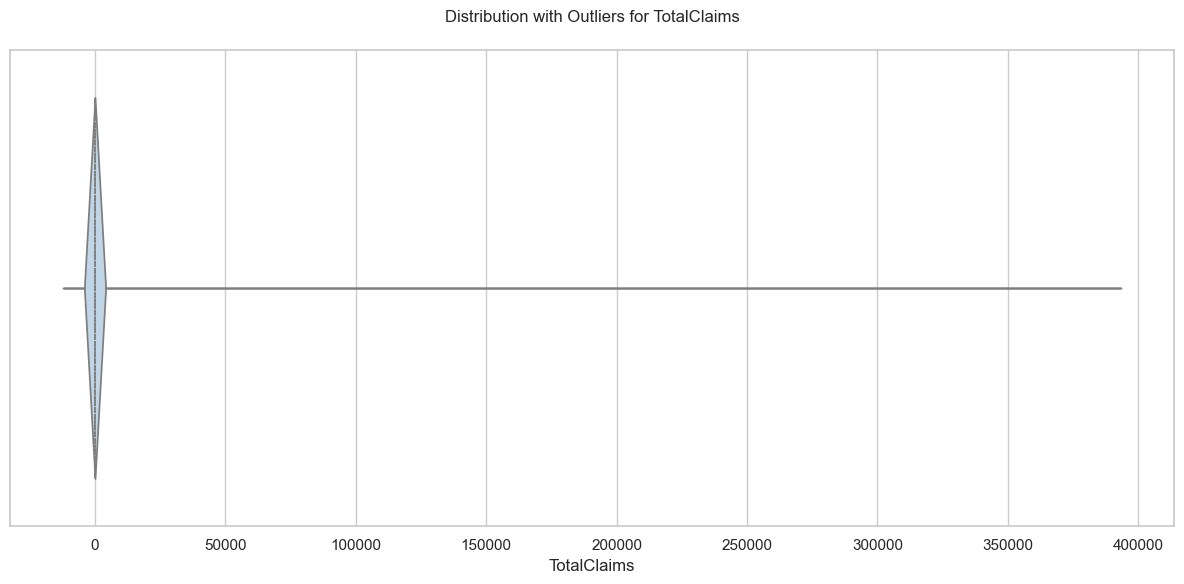


📊 Outlier Analysis for TotalPremium:
• Lower bound: -32.89
• Upper bound: 54.82
• Number of outliers: 209042 (20.90% of data)
• Min outlier value: -782.58
• Max outlier value: 65282.60


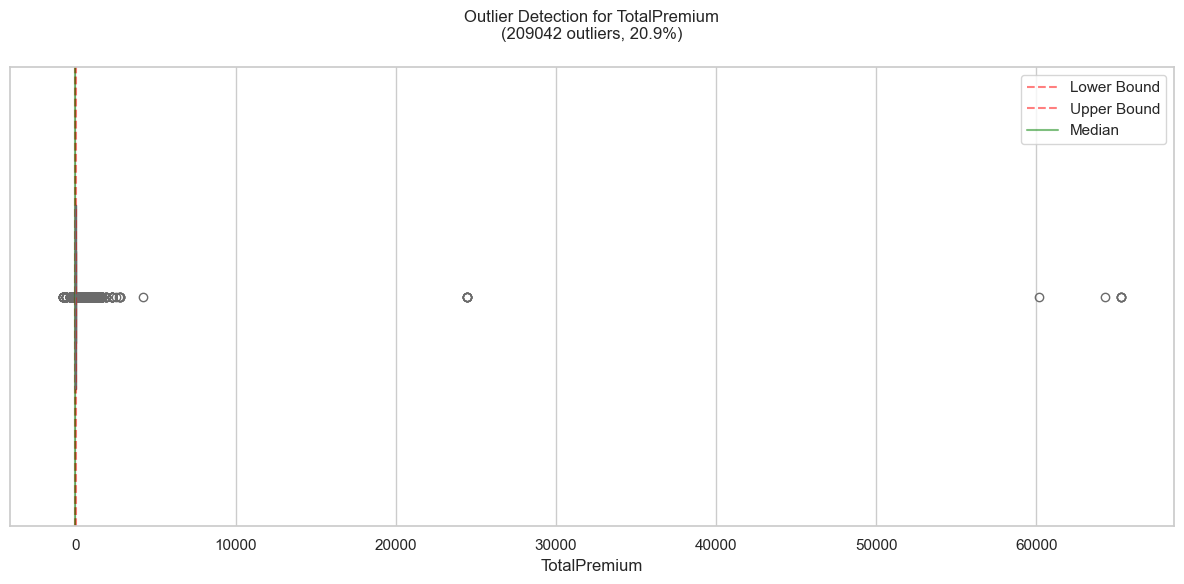

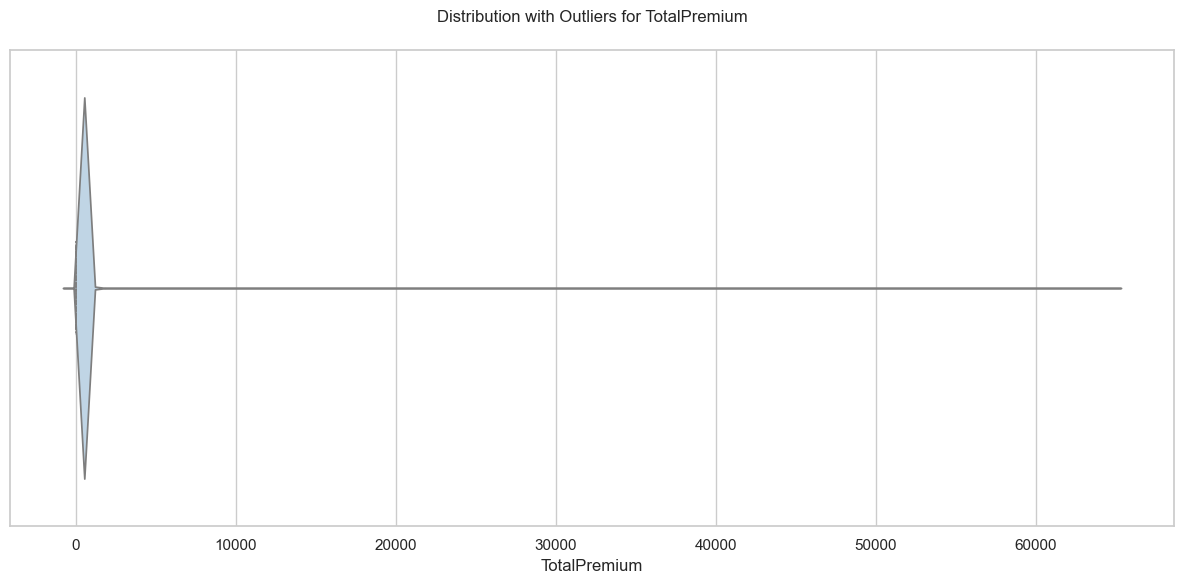


📊 Outlier Analysis for CustomValueEstimate:
• Lower bound: -82500.00
• Upper bound: 497500.00
• Number of outliers: 1785 (0.18% of data)
• Min outlier value: 500000.00
• Max outlier value: 26550000.00


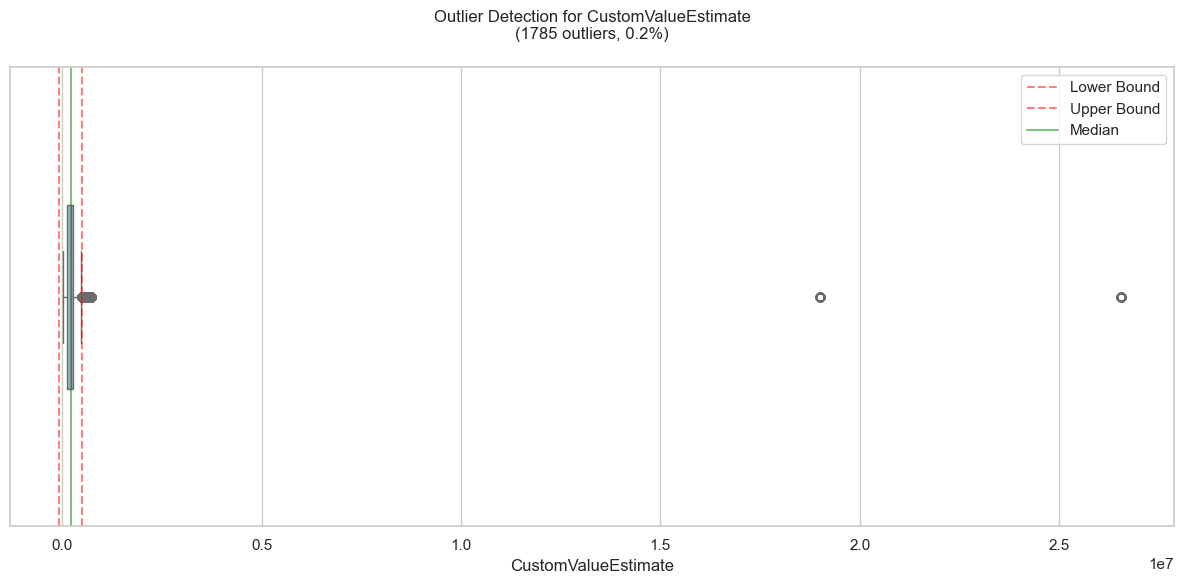

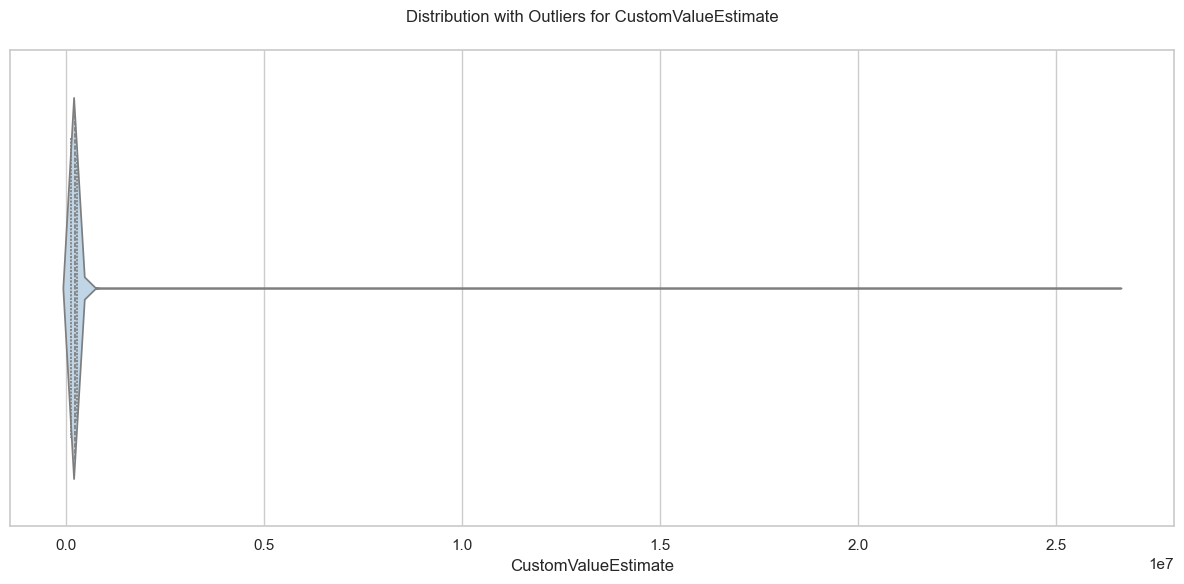

In [6]:

detect_outliers(
    clean_data,
    numerical_cols=['TotalClaims', 'TotalPremium', 'CustomValueEstimate'],
    whis=1.5,
    show_fliers=True
)